Metadata
This comprehensive set of fields will guide your analysis, helping you unravel the intricacies of client behavior and preferences.

client_id: Every client’s unique ID.
variation: Indicates if a client was part of the experiment.
visitor_id: A unique ID for each client-device combination.
visit_id: A unique ID for each web visit/session.
process_step: Marks each step in the digital process.
date_time: Timestamp of each web activity.
clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
clnt_age: Indicates the age of the client.
gendr: Specifies the client’s gender.
num_accts: Denotes the number of accounts the client holds with Vanguard.
bal: Gives the total balance spread across all accounts for a particular client.
calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500)

%matplotlib inline 

In [2]:
url = "https://raw.githubusercontent.com/KLoVi/vanguard-ab-test/main/Datasets_cleaned/df_pt_1%262_ABC.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.shape #(rows:317,235, columns:12)

(317235, 11)

In [5]:
df.tail(20)

,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
317215,629280,6426623,27047012_3402532492,685634090_42070675506_389171,confirm,2017-05-19 05:40:14,2017,5,19,05:40:14,Control
317216,629281,6426623,27047012_3402532492,685634090_42070675506_389171,step_3,2017-05-19 05:39:19,2017,5,19,05:39:19,Control
317217,629282,6426623,27047012_3402532492,685634090_42070675506_389171,step_2,2017-05-19 05:37:59,2017,5,19,05:37:59,Control
317218,629283,6426623,27047012_3402532492,685634090_42070675506_389171,step_1,2017-05-19 05:37:45,2017,5,19,05:37:45,Control
317219,629284,6426623,27047012_3402532492,685634090_42070675506_389171,start,2017-05-19 05:37:13,2017,5,19,05:37:13,Control
317220,629285,433098,5505424_50616523266,773565250_67577573147_389841,confirm,2017-05-13 15:33:04,2017,5,13,15:33:04,Control
317221,629286,433098,5505424_50616523266,773565250_67577573147_389841,step_3,2017-05-13 15:32:43,2017,5,13,15:32:43,Control
317222,629287,433098,5505424_50616523266,773565250_67577573147_389841,step_2,2017-05-13 15:31:09,2017,5,13,15:31:09,Control
317223,629288,433098,5505424_50616523266,773565250_67577573147_389841,step_1,2017-05-13 15:31:04,2017,5,13,15:31:04,Control
317224,629289,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,2017,5,13,15:30:47,Control


In [6]:
df.nunique()

Unnamed: 0      317235
client_id        50500
visitor_id       56011
visit_id         69205
process_step         5
date_time       283344
year                 1
month                4
day                 31
time             69704
Variation            2
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
df.head(3)

,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017,4,17,15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017,4,17,15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017,4,17,15:19:22,Test


In [9]:
df_steps = df.groupby(["visit_id"])[["process_step"]].count()

In [10]:
df_steps

,process_step
visit_id,
100012776_37918976071_457913,2
100019538_17884295066_43909,11
100022086_87870757897_149620,5
100030127_47967100085_936361,1
100037962_47432393712_705583,4
...,...
999971096_28827267783_236076,6
999976049_95772503197_182554,6
999984454_18731538378_781808,5


/var/folders/v4/fgnr7b6s2fdbdy6vyj585tz40000gn/T/ipykernel_4268/2183626455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_steps, x='process_step', palette="Set3")


<Axes: xlabel='process_step', ylabel='count'>

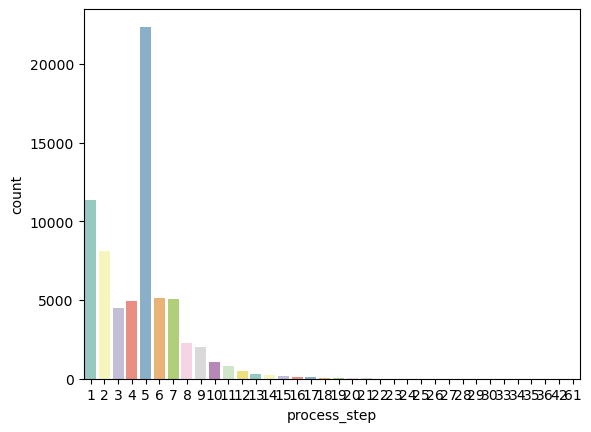

In [11]:
sns.countplot(data = df_steps, x='process_step', palette="Set3")

In [13]:
pivot_steps = pd.pivot_table(df, values = "date_time" , index= ["visit_id"] , columns = ["process_step"], aggfunc = "count", fill_value=0, margins = True, margins_name = 'Total')

In [14]:
pivot_steps #All clients, Test and Group

process_step,confirm,start,step_1,step_2,step_3,Total
visit_id,,,,,,
100012776_37918976071_457913,2,0,0,0,0,2
100019538_17884295066_43909,1,3,4,2,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100030127_47967100085_936361,0,1,0,0,0,1
100037962_47432393712_705583,0,3,1,0,0,4
...,...,...,...,...,...,...
999976049_95772503197_182554,1,1,1,1,2,6
999984454_18731538378_781808,1,1,1,1,1,5
999985675_64610694964_443659,1,1,1,1,1,5


In [15]:
new_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Reordenar columnas
pivot_steps  = pivot_steps[new_order]

In [16]:
# Agregar total por columnas
pivot_steps['Total'] = pivot_steps.sum(axis=1)

In [17]:
pivot_steps.sort_values(by="confirm", ascending=False)  # it can be changed by any column...

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
Total,101153,68210,56672,48264,42936,317235
155305468_93296256914_310722,0,0,0,0,11,11
820090283_58581376462_851669,0,0,0,0,10,10
834703874_81652602361_748606,3,1,10,12,9,35
50537501_11478756856_509628,0,0,0,0,9,9
...,...,...,...,...,...,...
532167812_45393287135_278929,1,1,0,0,0,2
532191040_71019681769_475228,3,2,3,0,0,8
532244967_68457846100_573639,1,1,0,0,0,2


In [18]:
pivot_steps.sort_values(by="Total", ascending=True)

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
782400983_8500261141_429504,0,0,0,0,1,1
506140725_11808223880_376693,1,0,0,0,0,1
872337799_53309182648_791756,1,0,0,0,0,1
505872123_95157850045_439851,1,0,0,0,0,1
959716735_23173688255_414325,1,0,0,0,0,1
...,...,...,...,...,...,...
834703874_81652602361_748606,3,1,10,12,9,35
428919026_83099642366_340343,14,11,6,4,1,36
428529357_6959155752_124163,17,15,8,2,0,42


In [ ]:
# "712824876_8175482950_365042" 61 total
# 198573972_32596117540_566598  only 1 confirm

In [75]:
df_y = df[df["visit_id"]=="100019538_17884295066_43909"]

In [76]:
df_y

,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
235335,7338123,612065484_94198474375,100019538_17884295066_43909,confirm,2017-04-09 16:24:58,2017,4,9,16:24:58,Test
235336,7338123,612065484_94198474375,100019538_17884295066_43909,step_3,2017-04-09 16:24:01,2017,4,9,16:24:01,Test
235337,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08,2017,4,9,16:22:08,Test
235338,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,2017,4,9,16:22:04,Test
235339,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,2017,4,9,16:21:59,Test
235340,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,2017,4,9,16:21:45,Test
235341,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,2017,4,9,16:21:41,Test
235342,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,2017,4,9,16:21:35,Test
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017,4,9,16:21:21,Test
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017,4,9,16:21:12,Test


In [77]:
df_y.sort_values(by = "date_time")

,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017,4,9,16:20:56,Test
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017,4,9,16:21:12,Test
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017,4,9,16:21:21,Test
235342,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,2017,4,9,16:21:35,Test
235341,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,2017,4,9,16:21:41,Test
235340,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,2017,4,9,16:21:45,Test
235339,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,2017,4,9,16:21:59,Test
235338,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,2017,4,9,16:22:04,Test
235337,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:22:08,2017,4,9,16:22:08,Test
235336,7338123,612065484_94198474375,100019538_17884295066_43909,step_3,2017-04-09 16:24:01,2017,4,9,16:24:01,Test


In [78]:
df["process_step"].value_counts()  #take a look from here...

process_step
start      101153
step_1      68210
step_2      56672
step_3      48264
confirm     42936
Name: count, dtype: int64

In [ ]:
# KPI COMPLETION RATE FOR TEST GROUP; df --> pivot_test --> pivot_confirm

In [ ]:
# 1st we filtered df for "Test" group:

In [55]:
dt = df[df["Variation"] == "Test"]

In [56]:
dt

,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017,4,17,15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017,4,17,15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017,4,17,15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017,4,17,15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017,4,17,15:18:04,Test
...,...,...,...,...,...,...,...,...,...,...
317226,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,2017,5,6,23:51:05,Test
317227,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,2017,5,6,23:50:40,Test
317228,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,2017,5,6,23:43:47,Test
317229,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,2017,5,6,23:43:34,Test


In [57]:
# Then we created the pivot table for the filtered dataframe with only the "test Group"
pivot_test = pd.pivot_table(dt, values = "date_time" , index= ["visit_id"] , columns = ["process_step"], aggfunc = "count", fill_value=0, margins = True, margins_name = 'Total')

In [58]:
pivot_test # iniatilly 37,137 rows × 6 columns

process_step,confirm,start,step_1,step_2,step_3,Total
visit_id,,,,,,
100012776_37918976071_457913,2,0,0,0,0,2
100019538_17884295066_43909,1,3,4,2,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,1,3,2,2,9
...,...,...,...,...,...,...
999971096_28827267783_236076,1,1,2,1,1,6
999976049_95772503197_182554,1,1,1,1,2,6
999984454_18731538378_781808,1,1,1,1,1,5


In [59]:
new_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

pivot_test  = pivot_test[new_order]

pivot_test['Total'] = pivot_test.sum(axis=1)

pivot_test 

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100012776_37918976071_457913,0,0,0,0,2,2
100019538_17884295066_43909,3,4,2,1,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,3,2,2,1,9
...,...,...,...,...,...,...
999971096_28827267783_236076,1,2,1,1,1,6
999976049_95772503197_182554,1,1,1,2,1,6
999984454_18731538378_781808,1,1,1,1,1,5


In [60]:
# We filter the pivot_steps df only for the data that at least start the process, 
# meaning that at least there is a "Start"


In [61]:
pivot_test = pivot_test[pivot_test["start"]!=0 ]

In [62]:
pivot_test  # 33,158 rows × 6 columns

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100019538_17884295066_43909,3,4,2,1,1,11
100022086_87870757897_149620,1,1,1,1,1,5
100173292_91322748906_143563,1,1,1,1,1,5
100217156_67053490690_383412,1,3,2,2,1,9
100221419_95702886123_228743,1,0,0,0,0,1
...,...,...,...,...,...,...
999971096_28827267783_236076,1,2,1,1,1,6
999976049_95772503197_182554,1,1,1,2,1,6
999984454_18731538378_781808,1,1,1,1,1,5


In [63]:
total_users_t = len(pivot_test["confirm"])
total_users_t  # total unique visit_id that at least start the process

33158

In [69]:
df_confirmed = pivot_test[(pivot_test["confirm"] != 0) & (pivot_test["Total"] >= 5)]
df_confirmed.sort_values(by = "confirm")

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100019538_17884295066_43909,3,4,2,1,1,11
675452138_15795115854_360781,1,1,1,1,1,5
675485567_72331837788_777760,1,1,1,1,1,5
675636034_8589319056_293625,1,1,1,1,1,5
675929292_4626313011_534413,1,1,1,1,1,5
...,...,...,...,...,...,...
238705546_73858196107_367279,1,1,1,1,8,12
981005401_83512424361_358636,2,1,1,1,8,13
354738736_98626604051_273278,1,1,1,1,8,12


In [65]:
total_confirm_t = len(df_confirmed["confirm"])
total_confirm_t  # total unique visit_id that at least start the process, 
                        #they go throug all the steps including confirm.

17862

In [66]:
completion_test = round((total_confirm_t/total_users_t)*100,2)

In [67]:
completion_test

53.87

In [ ]:
# KPI COMPLETION RATE FOR CONTROL GROUP; df --> pivot_cntrl --> pivot_crtl_confirm

In [ ]:
# 1st we filtered df for "Control" group:

In [24]:
dc = df[df["Variation"] == "Control"]

In [25]:
dc

,client_id,visitor_id,visit_id,process_step,date_time,year,month,day,time,Variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,2017,4,5,12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,2017,4,5,12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,2017,4,5,12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,2017,4,5,12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,2017,4,5,12:24:43,Control
...,...,...,...,...,...,...,...,...,...,...
317224,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,2017,5,13,15:30:47,Control
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,2017,5,10,22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,2017,5,10,22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,2017,5,10,22:56:23,Control


In [26]:
# Then we created the pivot table for the filtered dataframe with only the "Control Group"
pivot_ctrl = pd.pivot_table(dc, values = "date_time" , index= ["visit_id"] , columns = ["process_step"], aggfunc = "count", fill_value=0, margins = True, margins_name = 'Total')

In [27]:
pivot_ctrl # iniatilly 32,190 rows × 6 columns

process_step,confirm,start,step_1,step_2,step_3,Total
visit_id,,,,,,
100030127_47967100085_936361,0,1,0,0,0,1
100037962_47432393712_705583,0,3,1,0,0,4
100057941_88477660212_944512,0,1,2,2,2,7
10006594_66157970412_679648,1,1,1,1,3,7
100071743_53464757454_616703,0,1,0,0,0,1
...,...,...,...,...,...,...
999890184_77121766521_746360,0,6,1,1,0,8
999936732_27995195904_324897,0,1,1,0,0,2
999951892_54774917180_163890,0,1,0,0,0,1


In [34]:
new_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

pivot_ctrl  = pivot_ctrl[new_order]

pivot_ctrl['Total'] = pivot_ctrl.sum(axis=1)

pivot_ctrl.sort_values(by="start")

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100030127_47967100085_936361,1,0,0,0,0,1
655247446_50885404204_583666,1,1,4,4,1,11
655189228_98396100923_109135,1,0,0,0,0,1
655186770_88840551654_812142,1,1,1,1,1,5
655146607_67269357536_550430,1,1,1,1,2,6
...,...,...,...,...,...,...
542291007_99212333873_758727,16,0,0,0,0,16
704585335_84106003655_168533,19,1,2,2,0,24
447501825_86900283385_427480,19,0,0,0,0,19


In [29]:
# We filter the pivot_steps df only for the data that at least start the process, 
# meaning that at least there is a "Start"

In [30]:
pivot_ctrl = pivot_ctrl[pivot_ctrl["start"]!=0 ]

In [70]:
pivot_ctrl.sort_values(by = "confirm")  # 30,911 rows × 6 columns

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
100030127_47967100085_936361,1,0,0,0,0,1
605473562_39963757552_983118,1,0,0,0,0,1
605472620_18234953391_84939,3,0,0,0,0,3
605444243_93356569644_566945,1,1,1,1,0,4
605363654_64320920152_436125,1,1,0,0,0,2
...,...,...,...,...,...,...
186680590_18659693710_82534,1,1,1,1,8,12
914956053_41671662559_636326,1,1,1,1,8,12
502960396_34312689040_425168,1,1,1,1,8,12


In [32]:
total_users_c = len(pivot_ctrl["confirm"])
total_users_c  # total unique visit_id that at least start the process: 30,911

30911

In [148]:
df_confirmed_c = pivot_ctrl[(pivot_ctrl["confirm"] != 0) & (pivot_ctrl["Total"] >= 5)]
df_confirmed_c 

process_step,start,step_1,step_2,step_3,confirm,Total
visit_id,,,,,,
10006594_66157970412_679648,1,1,1,3,1,7
10007589_47780784567_391490,1,1,1,1,1,5
100254180_47139859079_984581,1,1,1,1,1,5
100309269_21684743336_936307,1,1,1,1,1,5
100471971_3065983298_584030,2,1,1,1,1,6
...,...,...,...,...,...,...
999528108_94761236019_731649,1,3,3,3,1,11
999528902_49133507319_516085,1,1,1,1,1,5
999859408_41720215615_938916,2,1,1,1,1,6


In [149]:
total_confirm_c = len(df_confirmed_c["confirm"])
total_confirm_c  # total unique visit_id that at least start the process, 
                        #they go throug all the steps including confirm (14,833)

14833

In [150]:
completion_ctrl = round((total_confirm_c/total_users_c)*100,2)

In [151]:
completion_ctrl

47.99